# Laboratorio 1

## Ejercicio 1

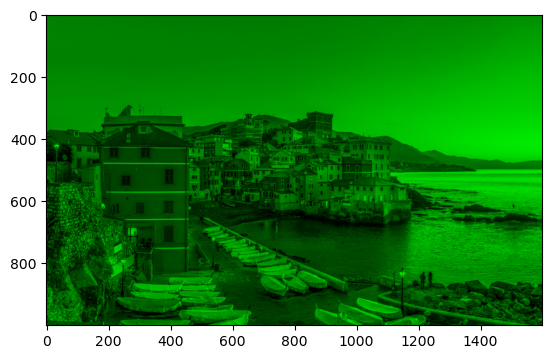

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def activar_canales(imagen, color):
    # Leer la imagen
    img = cv2.imread(imagen)
    
    # Crear una imagen negra con las mismas dimensiones
    canales_activos = np.zeros_like(img)
    
    if color == 1:
        canales_activos[:, :, 0] = img[:, :, 0]  # Azul
    elif color == 2:
        canales_activos[:, :, 1] = img[:, :, 1]  # Verde
    elif color == 3:
        canales_activos[:, :, 2] = img[:, :, 2]  # Rojo
    elif color == 10:
        canales_activos[:, :, 1] = img[:, :, 1]  # Verde
        canales_activos[:, :, 2] = img[:, :, 2]  # Rojo
    elif color == 20:
        canales_activos[:, :, 0] = img[:, :, 0]  # Azul
        canales_activos[:, :, 1] = img[:, :, 1]  # Verde
    elif color == 30:
        canales_activos[:, :, 0] = img[:, :, 0]  # Azul
        canales_activos[:, :, 2] = img[:, :, 2]  # Rojo
    
    return canales_activos

img_resultado = activar_canales('/Users/diegoalvarez/Documents/GitHub/Text-Mining-Image-Recognition/imagen.jpg', 2)
plt.imshow(cv2.cvtColor(img_resultado, cv2.COLOR_BGR2RGB))
plt.show()

## Ejercicio 2

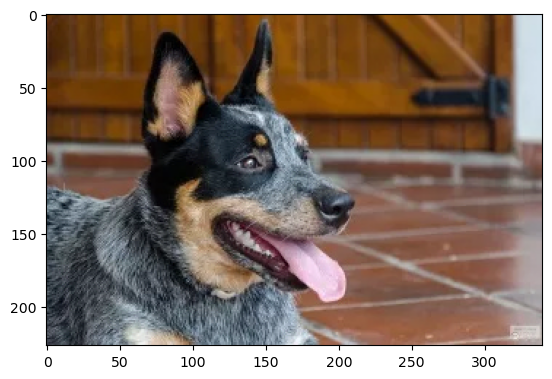

In [11]:
def reconstruir_imagen_color(imagen1, imagen2, imagen3):
    # Leer las imágenes en escala de grises
    img_azul = cv2.imread(imagen1, cv2.IMREAD_GRAYSCALE)
    img_verde = cv2.imread(imagen2, cv2.IMREAD_GRAYSCALE)
    img_rojo = cv2.imread(imagen3, cv2.IMREAD_GRAYSCALE)
    
    # Crear una imagen vacía con tres canales
    img_color = cv2.merge([img_azul, img_verde, img_rojo])
    
    return img_color

# Ejemplo de uso
img_reconstruida = reconstruir_imagen_color('perro_salida_gray_azul.jpg', 'perro_salida_gray_verde.jpg', 'perro_salida_gray_rojo.jpg')
plt.imshow(cv2.cvtColor(img_reconstruida, cv2.COLOR_BGR2RGB))
plt.show()



## Ejercicio 3

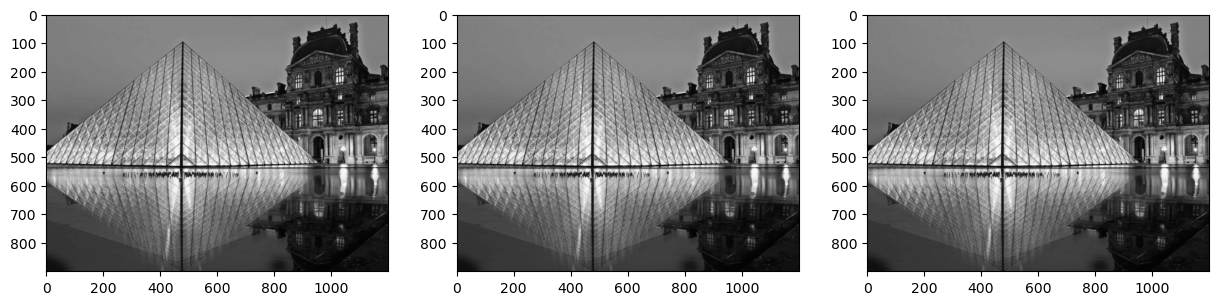

In [12]:
def escala_grises_3d(imagen):
    img = cv2.imread(imagen)
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_gris_1 = np.copy(img_gris)
    img_gris_2 = np.copy(img_gris)
    img_gris_3 = np.copy(img_gris)
    
    return img_gris_1, img_gris_2, img_gris_3

# Ejemplo de uso
gris1, gris2, gris3 = escala_grises_3d('imagen2.jpg')
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(gris1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(gris2, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(gris3, cmap='gray')
plt.show()


## Ejercicio 4

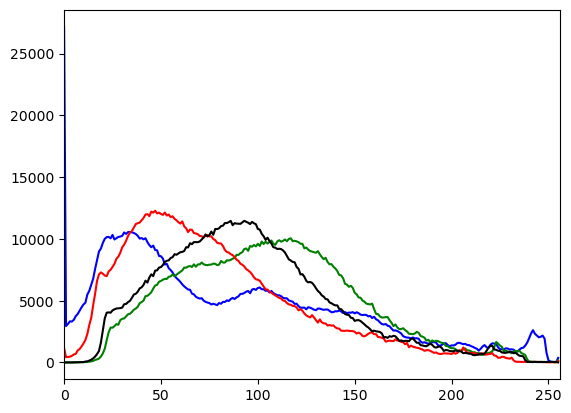

In [16]:
def mostrar_histogramas(imagen):
    img = cv2.imread(imagen)
    
    # Separar los canales de color
    canales = ('b', 'g', 'r')
    for i, col in enumerate(canales):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color = col)
        plt.xlim([0, 256])
        plt.axvline(x=np.mean(hist), color='k', linestyle='dashed', linewidth=1)
    
    # Convertir la imagen a escala de grises y calcular el histograma
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist_gris = cv2.calcHist([img_gris], [0], None, [256], [0, 256])
    plt.plot(hist_gris, color='k')
    plt.axvline(x=np.mean(hist_gris), color='k', linestyle='dashed', linewidth=1)
    
    plt.show()

# Ejemplo de uso
mostrar_histogramas('imagen3.jpg')


## Ejercicio 5

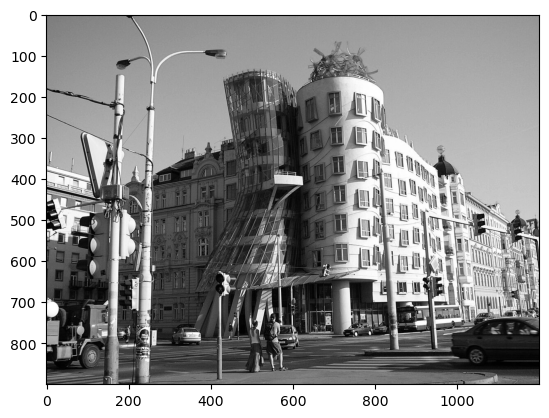

In [17]:
def escala_grises_ponderada(imagen):
    img = cv2.imread(imagen)
    
    # Coeficientes ponderados típicos para el enfoque de escala de grises
    ponderaciones = [0.2989, 0.5870, 0.1140]
    
    img_gris_ponderada = cv2.transform(img, np.array(ponderaciones).reshape((1, 3)))
    
    return img_gris_ponderada

# Ejemplo de uso
img_gris_ponderada = escala_grises_ponderada('imagen4.jpg')
plt.imshow(img_gris_ponderada, cmap='gray')
plt.show()


## Ejercicio 6

#### Espacio de Color HSV

El espacio de color HSV es un modelo de color que se utiliza para representar colores de una manera más cercana a como los perciben los humanos. HSV es un acrónimo de Hue (Matiz), Saturation (Saturación) y Value (Valor). Este modelo de color es especialmente útil en aplicaciones de procesamiento de imágenes porque permite una manipulación más intuitiva de los colores en comparación con el modelo RGB.

- Componentes del espacio de color HSV

1. HUE (Matiz):

- Representa el tipo de color y se mide en grados a lo largo de un círculo cromático.

- El valor de Hue varía de 0 a 360 grados.

- 0° corresponde al rojo, 120° al verde y 240° al azul.

2. Saturation (Saturación):

- Indica la pureza o intensidad del color.

- Va de 0 a 100%, donde 0% es un gris sin color (completamente desaturado) y 100% es un color puro (completamente saturado).

3. Value (Valor):

- Define el brillo del color.

- También va de 0 a 100%, donde 0% es completamente negro y 100% es el brillo máximo del color

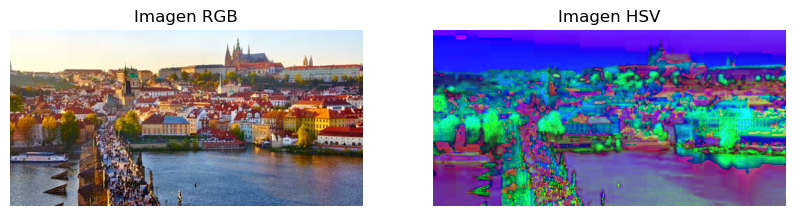

In [18]:
# Leer la imagen en RGB
img_rgb = cv2.imread('imagen5.jpg')
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

# Convertir la imagen de RGB a HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

# Mostrar la imagen original y la imagen en el espacio HSV
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Imagen RGB')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Imagen HSV')
plt.imshow(img_hsv)
plt.axis('off')

plt.show()